# **Pakistan Suicide Bombing Attacks EDA**

## Importing Libraries

In [19]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


## Loading the dataset

In [2]:
df=pd.read_csv('/content/Suicide_bombing_attacks.csv')
df.head()

,Date,Date2,Day,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,November 19-1995,Sunday,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,November 6-2000,Monday,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,Wednesday-May 8-2002,May 8-2002,Wednesday,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday-June 14-2002,June 14-2002,Friday,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,Friday-July 4-2003,July 4-2003,Friday,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Date2                    988 non-null    object 
 2   Day                      988 non-null    object 
 3   Islamic Date             678 non-null    object 
 4   Blast Day Type           967 non-null    object 
 5   Holiday Type             144 non-null    object 
 6   Time                     566 non-null    object 
 7   City                     988 non-null    object 
 8   Latitude                 983 non-null    float64
 9   Longitude                983 non-null    object 
 10  Province                 988 non-null    object 
 11  Location                 982 non-null    object 
 12  Location Category        988 non-null    object 
 13  Location Sensitivity     988 non-null    object 
 14  Open/Closed Space        9

In [4]:
#checking null values
df.isnull().sum()

Date                         0
Date2                        0
Day                          0
Islamic Date               310
Blast Day Type              21
Holiday Type               844
Time                       422
City                         0
Latitude                     5
Longitude                    5
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space           70
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                 292
Killed Max                   0
Injured Min                262
Injured Max                 64
No. of Suicide Blasts      164
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)              10
Temperature(F)              14
dtype: int64

In [5]:
#filling null with mode for categorical data
df['Blast Day Type']=df['Blast Day Type'].fillna(df['Blast Day Type'].mode()[0])
df['Holiday Type']=df['Holiday Type'].fillna(df['Holiday Type'].mode()[0])
df['Open/Closed Space']=df['Open/Closed Space'].fillna(df['Open/Closed Space'].mode()[0])

In [6]:
#dropiing null values in longitutde and latitude column
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [7]:
#filling killed max,Injured max and injured min column by taking the mean
df['Killed Max']=df['Killed Max'].fillna(df['Killed Max'].mean())


In [8]:
df['Injured Min']=df['Injured Min'].fillna(df['Injured Min'].mean())


In [9]:
# Remove the '+' character
df['Injured Max'] = df['Injured Max'].str.replace('+', '', regex=False)

In [10]:
df['Injured Max']=df['Injured Max'].fillna(df['Injured Max'].astype(float).mean())

In [11]:
#filling temperature nulls with mean
df['Temperature(C)']=df['Temperature(C)'].fillna(df['Temperature(C)'].mean())
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['No. of Suicide Blasts']=df['No. of Suicide Blasts'].fillna(df['No. of Suicide Blasts'].mean())

In [12]:
df['Explosive Weight (max)'] = df['Explosive Weight (max)'].str.replace(r'[^0-9.]+', '', regex=True)
df['Explosive Weight (max)'] = pd.to_numeric(df['Explosive Weight (max)'], errors='coerce')

# Fill NaN values with a suitable method, here filling with the mean as an example
df['Explosive Weight (max)'].fillna(df['Explosive Weight (max)'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Date                         0
Date2                        0
Day                          0
Islamic Date               306
Blast Day Type               0
Holiday Type                 0
Time                       418
City                         0
Latitude                     0
Longitude                    0
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space            0
Influencing Event/Event    608
Target Type                  0
Targeted Sect if any       789
Killed Min                   0
Killed Max                   0
Injured Min                  0
Injured Max                  0
No. of Suicide Blasts        0
Explosive Weight (max)       0
Hospital Names             392
Temperature(C)               0
Temperature(F)               0
dtype: int64

In [13]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

## Patterns and Frequenies

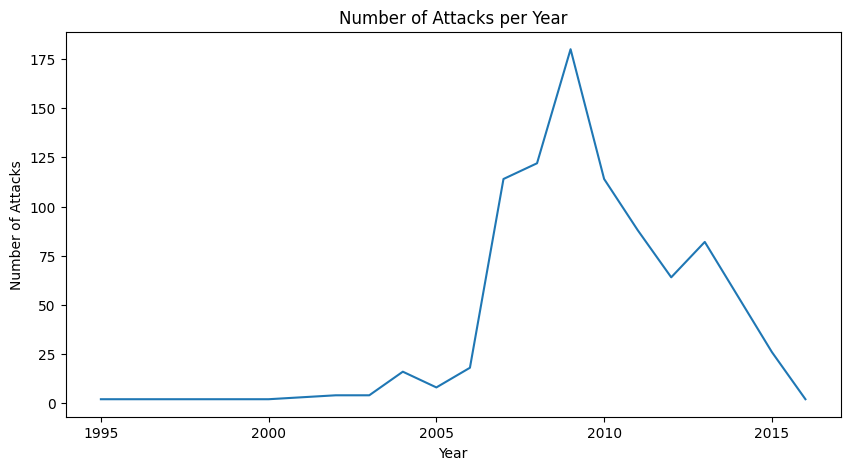

In [14]:
# Attacks over time
df['Year'] = df['Date'].dt.year
attacks_per_year = df.groupby('Year').size()

plt.figure(figsize=(10,5))
sns.lineplot(data=attacks_per_year)
plt.title('Number of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

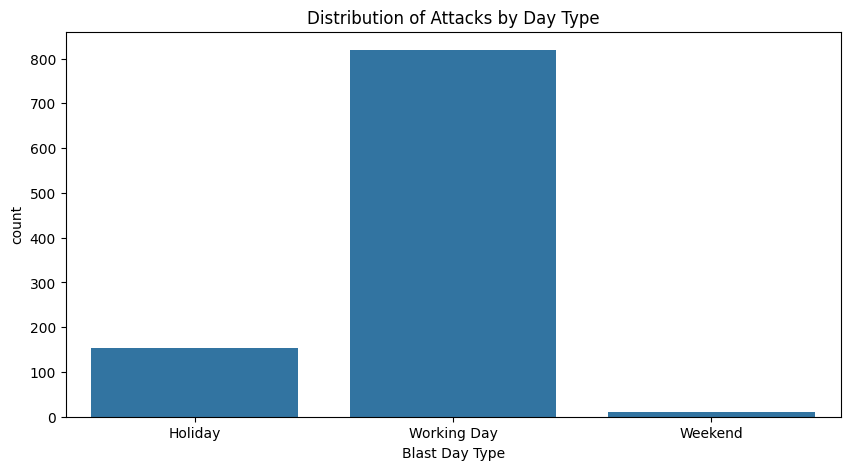

In [15]:
# Distribution of attacks by day and time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Blast Day Type')
plt.title('Distribution of Attacks by Day Type')
plt.show()

In [16]:
import folium

map = folium.Map(location=[30.3753, 69.3451], zoom_start=6)
for idx, row in df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=2, color='red').add_to(map)

map.save('attacks_map.html')

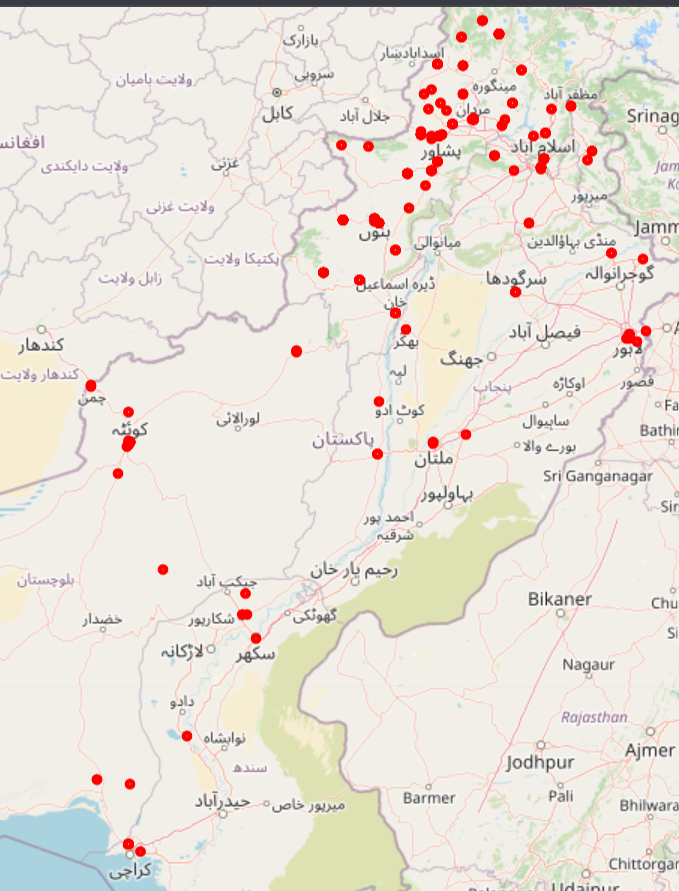

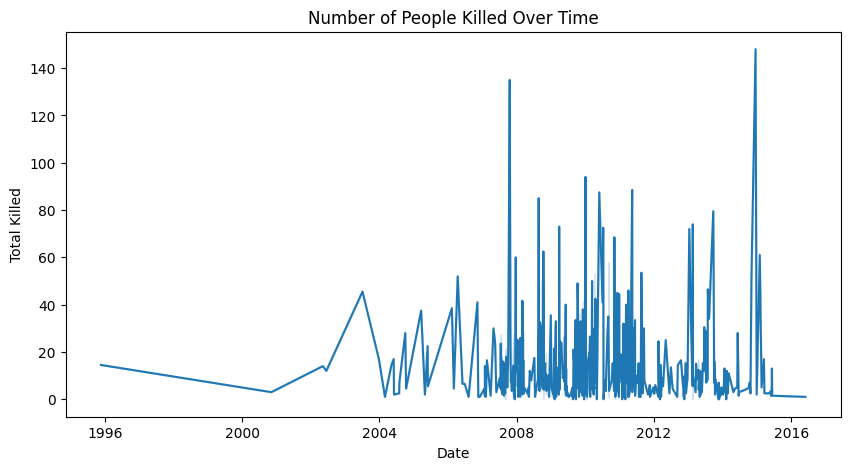

In [17]:
# Impact Analysis
df['Total Killed'] = df[['Killed Min', 'Killed Max']].mean(axis=1)
# df['Total Injured'] = df[['Injured Min', 'Injured Max']].mean(axis=1)

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Total Killed')
plt.title('Number of People Killed Over Time')
plt.xlabel('Date')
plt.ylabel('Total Killed')
plt.show()

## TF-IDF and logistic regression

In [20]:
# Preprocess text data (example for 'Influencing Event/Event')
df['Influencing Event/Event'] = df['Influencing Event/Event'].fillna('Unknown')
df['Influencing Event/Event'] = df['Influencing Event/Event'].str.lower()

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Influencing Event/Event'])

# Encode target variable if it's categorical
y = df['Target Type']
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.4467005076142132
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.50      0.27      0.35        30
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.62      0.43      0.51        49
          13       0.36      0.91      0.52        53
          16       0.70      0.54      0.61        13
          17       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         3
          23       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch


In [22]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



In [23]:
# Preprocess text data (example for 'Influencing Event/Event')
df['Influencing Event/Event'] = df['Influencing Event/Event'].fillna('Unknown')
df['Influencing Event/Event'] = df['Influencing Event/Event'].str.lower()

# Encode target variable if it's categorical
y = df['Target Type']
le = LabelEncoder()
y = le.fit_transform(y)

# Feature extraction: convert text column to list
texts = df['Influencing Event/Event'].tolist()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

In [24]:
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y)))

# Create dataset and dataloader
max_len = 128
train_dataset = TextDataset(X_train, y_train, tokenizer, max_len)
test_dataset = TextDataset(X_test, y_test, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
# Train the model (simplified)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
model.train()
for epoch in range(3):  # Number of epochs
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()



KeyboardInterrupt: 

In [ ]:
# Evaluate the model
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = model(input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs.logits, dim=1)
        predictions.extend(preds)
        true_labels.extend(labels)



In [ ]:
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(true_labels, predictions))
